In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('nbagg')
from matplotlib import style
import time
from time import gmtime, strftime
style.use('ggplot')

### <center> This file examines both stationary data and walking data at 100 bpm</center>

### We will now read in walking data at 100 bpm from both feet

In [5]:
#Read in the Left foot acceleraometer data
acc1 = pd.read_csv('L_100.csv',low_memory=False)
#Read in Right foot acceleraometer data
acc2 = pd.read_csv('R_100.csv',low_memory=False)
acc1.apply(pd.to_numeric, errors='ignore');
acc2.apply(pd.to_numeric, errors='ignore');
acc1.head()


epoc (ms)       timestamp (-04:00)  elapsed (s)  x-axis (g)  \
0  1478042378811  2016-11-01T19.19.38.811     0.000000    0.131348   
1  1478042378832  2016-11-01T19.19.38.832     0.020508    0.131836   
2  1478042378851  2016-11-01T19.19.38.851     0.039551    0.130859   
3  1478042378871  2016-11-01T19.19.38.871     0.060059    0.130371   
4  1478042378890  2016-11-01T19.19.38.890     0.079102    0.130859   

   y-axis (g)  z-axis (g)  
0    0.043457    0.990234  
1    0.044434    0.998535  
2    0.044922    0.995605  
3    0.043945    0.997070  
4    0.042480    0.998047

In [6]:
acc2.head()


epoc (ms)       timestamp (-04:00)  elapsed (s)  x-axis (g)  \
0  1478042379948  2016-11-01T19.19.39.948     0.000000    0.112793   
1  1478042379969  2016-11-01T19.19.39.969     0.020508    0.113281   
2  1478042379989  2016-11-01T19.19.39.989     0.041016    0.113281   
3  1478042380010  2016-11-01T19.19.40.010     0.061523    0.113281   
4  1478042380030  2016-11-01T19.19.40.030     0.082031    0.111816   

   y-axis (g)  z-axis (g)  
0   -0.011719    0.977539  
1   -0.011719    0.985840  
2   -0.012207    0.981445  
3   -0.011719    0.981934  
4   -0.011230    0.982422

### Now compute the difference between the starting times of these sensors

In [7]:
def str2secs(s):
    h,m,s,ss = map(float,s.split('.')) 
    return h*3600+m*60 + s+0.001*ss

t1_start = acc1['timestamp (-04:00)'][0].split('T')[1]
t2_start = acc2['timestamp (-04:00)'][0].split('T')[1]
offset = str2secs(t2_start) - str2secs(t1_start)

print(offset)

1.137


### The offset tells us that each sample in table two is delayed by 1.137 seconds relative to the first sensor
### Now add a new column in the second table, adding in the offset from the first sensor
### This ensures that all time stamps in the second table is evaluated relative to those in the first
#### The "time-offset" column contains the time stamps relative to the first sensor

In [8]:
acc2['time-offset'] = offset+acc2['elapsed (s)']
acc2.head()

epoc (ms)       timestamp (-04:00)  elapsed (s)  x-axis (g)  \
0  1478042379948  2016-11-01T19.19.39.948     0.000000    0.112793   
1  1478042379969  2016-11-01T19.19.39.969     0.020508    0.113281   
2  1478042379989  2016-11-01T19.19.39.989     0.041016    0.113281   
3  1478042380010  2016-11-01T19.19.40.010     0.061523    0.113281   
4  1478042380030  2016-11-01T19.19.40.030     0.082031    0.111816   

   y-axis (g)  z-axis (g)  time-offset  
0   -0.011719    0.977539     1.137000  
1   -0.011719    0.985840     1.157508  
2   -0.012207    0.981445     1.178016  
3   -0.011719    0.981934     1.198523  
4   -0.011230    0.982422     1.219031

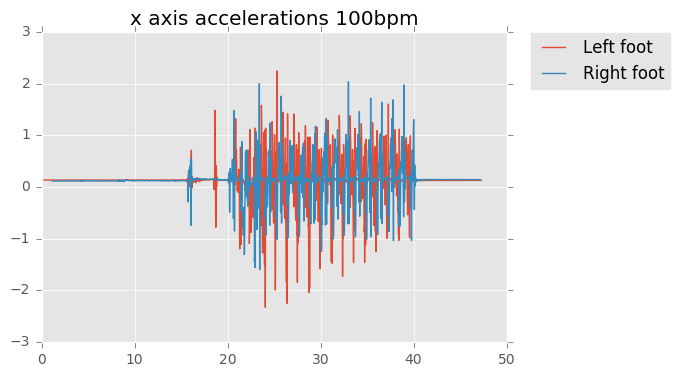

In [14]:
plt.title("x axis accelerations 100bpm")
plt.plot(acc1['elapsed (s)'],acc1['x-axis (g)'],label="Left foot")
plt.plot(acc2['time-offset'],acc2['x-axis (g)'],label="Right foot")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


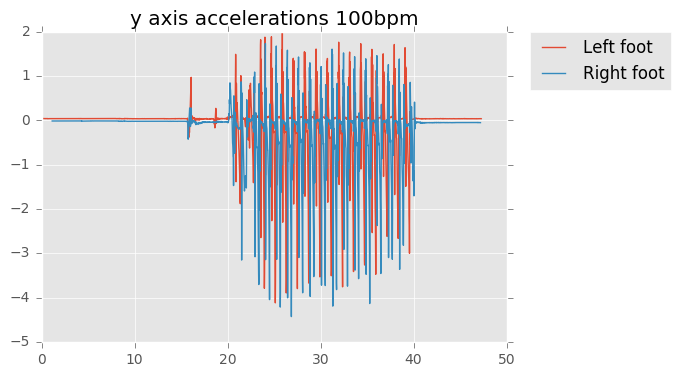

In [15]:
plt.title("y axis accelerations 100bpm")
plt.plot(acc1['elapsed (s)'],acc1['y-axis (g)'],label="Left foot")
plt.plot(acc2['time-offset'],acc2['y-axis (g)'],label="Right foot")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

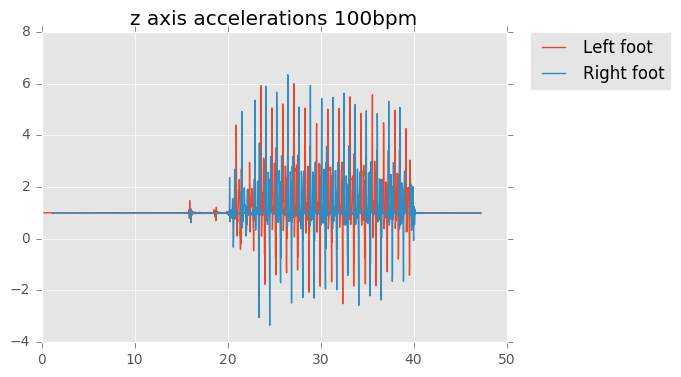

In [16]:
plt.title("z axis accelerations 100bpm")
plt.plot(acc1['elapsed (s)'],acc1['z-axis (g)'],label="Left foot")
plt.plot(acc2['time-offset'],acc2['z-axis (g)'],label="Right foot")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Next, we measure stationary data to measure gravity 

### For this part, Accleration and Gyrocope data are measured by two different sensors

In [29]:
#Read in the stationary acceleration
acc = pd.read_csv('Acc_stationary.csv',low_memory=False)
#Read in stationary Gyroscope data
gyro = pd.read_csv('Gyro_stationary.csv',low_memory=False)

In [30]:
#Convert the dataframe values to numerical ones
acc.apply(pd.to_numeric, errors='ignore');
gyro.apply(pd.to_numeric, errors='ignore');

In [31]:
acc.head()

epoc (ms)       timestamp (-04:00)  elapsed (s)  x-axis (g)  \
0  1477768025222  2016-10-29T15.07.05.222     0.000000   -0.115234   
1  1477768025241  2016-10-29T15.07.05.241     0.019043   -0.114258   
2  1477768025262  2016-10-29T15.07.05.262     0.039551   -0.113281   
3  1477768025281  2016-10-29T15.07.05.281     0.058594   -0.112793   
4  1477768025301  2016-10-29T15.07.05.301     0.079102   -0.116211   

   y-axis (g)  z-axis (g)  
0    0.034668    0.987305  
1    0.035156    0.994141  
2    0.033203    0.994141  
3    0.032227    0.995605  
4    0.034668    0.997070

In [32]:
gyro.head()

epoc (ms)       timestamp (-04:00)  elapsed (s)  x-axis (deg/s)  \
0  1477768048841  2016-10-29T15.07.28.841     0.000000        0.183105   
1  1477768048860  2016-10-29T15.07.28.860     0.019043        0.183105   
2  1477768048880  2016-10-29T15.07.28.880     0.039551        0.183105   
3  1477768048901  2016-10-29T15.07.28.901     0.060059        0.183105   
4  1477768048921  2016-10-29T15.07.28.921     0.080566        0.183105   

   y-axis (deg/s)  z-axis (deg/s)  
0        1.403809       -0.610352  
1        1.586914       -0.671387  
2        1.708984       -0.549316  
3        2.319336       -0.549316  
4        2.563477       -0.427246

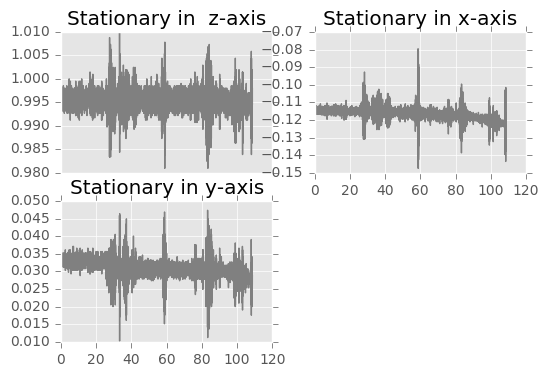

In [33]:
plt.subplot(221)
plt.title("Stationary in  z-axis")
plt.plot(acc['elapsed (s)'],acc['z-axis (g)'],color='0.5')
plt.xticks(())
plt.subplot(222)
plt.title("Stationary in x-axis")
plt.plot(acc['elapsed (s)'],acc['x-axis (g)'],color='0.5')
plt.subplot(223)
plt.title("Stationary in y-axis")
plt.plot(acc['elapsed (s)'],acc['y-axis (g)'],color='0.5')
plt.show()

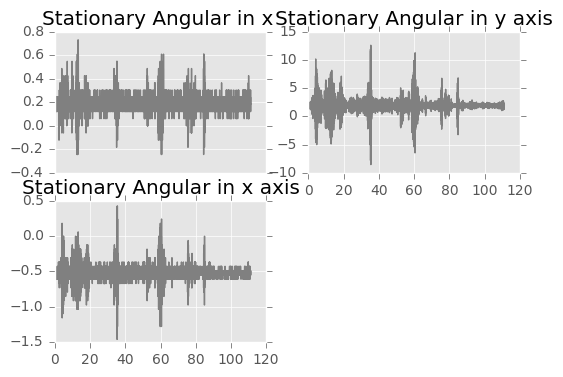

In [34]:
plt.subplot(221)
plt.title("Stationary Angular in x ")
plt.plot((gyro['elapsed (s)']),gyro['x-axis (deg/s)'],color='0.5')
plt.xticks(())

plt.subplot(222)
plt.title("Stationary Angular in y axis")
plt.plot((gyro['elapsed (s)']),gyro['y-axis (deg/s)'],color='0.5')

plt.subplot(223)
plt.title("Stationary Angular in x axis")
plt.plot((gyro['elapsed (s)']),gyro['z-axis (deg/s)'],color="0.5")

plt.show()

In [37]:
#the two tables don't start at the same time, so I am calculating the relative offset between the start times
#Once we have the offset, we can add the subsequent timestampts to find the times for each sample in the second
#table relative to the first
t1_start = acc['timestamp (-04:00)'][0].split('T')[1]
t2_start = gyro['timestamp (-04:00)'][0].split('T')[1]

#"offset" contains the time difference between the start times of the first and second table
# this is used to find the different starting times of multiple sensors
offset = str2secs(t2_start) - str2secs(t1_start)


In [38]:
gyro['time-offset'] = offset+gyro['elapsed (s)']

In [39]:
gyro.head()

epoc (ms)       timestamp (-04:00)  elapsed (s)  x-axis (deg/s)  \
0  1477768048841  2016-10-29T15.07.28.841     0.000000        0.183105   
1  1477768048860  2016-10-29T15.07.28.860     0.019043        0.183105   
2  1477768048880  2016-10-29T15.07.28.880     0.039551        0.183105   
3  1477768048901  2016-10-29T15.07.28.901     0.060059        0.183105   
4  1477768048921  2016-10-29T15.07.28.921     0.080566        0.183105   

   y-axis (deg/s)  z-axis (deg/s)  time-offset  
0        1.403809       -0.610352    23.619000  
1        1.586914       -0.671387    23.638043  
2        1.708984       -0.549316    23.658551  
3        2.319336       -0.549316    23.679059  
4        2.563477       -0.427246    23.699566

In [ ]:
### Let's just plot the a

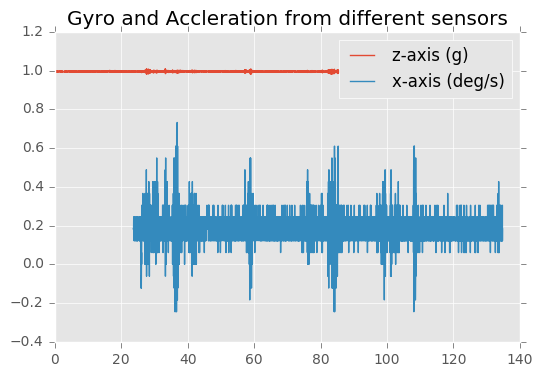

In [40]:
plt.plot(acc['elapsed (s)'],acc['z-axis (g)'])
plt.plot(gyro['time-offset'],gyro['x-axis (deg/s)'])
plt.title("Gyro and Accleration from different sensors")
plt.legend()

plt.show()